# Activities Scraper

In [2]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By


In [3]:
species = pd.read_csv('all_species_112222.csv')

# all np codes
park_codes = species['Park Code'].unique()
len(park_codes)

62

In [4]:
driver = webdriver.Chrome(service=ChromeService(executable_path=ChromeDriverManager().install()))

[WDM] - Downloading: 100%|██████████| 7.72M/7.72M [00:00<00:00, 9.69MB/s]


### Pull activities for all parks

In [5]:
def pull_activities(code):
    driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(code))
    activities_txt = []

    if len(activities_txt) == 0:
        activities_web = driver.find_elements(By.XPATH, '//h2[@class="Feature-title carrot-end"]')
        activities_txt = [b.text for b in activities_web]

    if len(activities_txt) == 0:
        activities_web = driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
        activities_txt = [b.text for b in activities_web]
    if len(activities_txt) == 0:
        activities_web = driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
        activities_txt = [b.text for b in activities_web]
    if len(activities_txt) == 0:
        # for bibe, glacier
        activities_web = driver.find_elements(By.XPATH, '//h3[@class="ActivityListing-title"]')
        activities_txt = [b.text for b in activities_web]
    if len(activities_txt) == 0:
        activities_web = driver.find_elements(By.XPATH, '//h2[@class="Feature-title carrot-end"]')
        activities_txt = [b.text for b in activities_web]

    if len(activities_txt) == 0:
        # for arches, canyonlands, congaree. everg, gb
        activities_links = driver.find_elements(By.CSS_SELECTOR, "a[id^=CP___PAGEID]")
        activities_txt = [b.text for b in activities_links]
        
        #bisc has to click on outdoor activities
    if len(activities_txt) == 0:
        # for bryce
        activities_web = driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
        activities_txt = [b.text for b in activities_web]
    #if len(activities_txt) == 0:

    #if len(activities_txt) == 0:
    #    activities_web = driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
    #    activities_txt = [b.text for b in activities_web]
        
    return activities_txt

In [6]:
activities_df = pd.DataFrame()
activities_df['park'] = park_codes
activities_df['activities'] = [pull_activities(c) for c in activities_df['park']]
activities_df

,park,activities
0,ACAD,"[Hiking in Acadia, Bicycling, Birdwatching, St..."
1,ARCH,"[Auto Touring, Backpacking, Biking, Camping, C..."
2,BADL,[]
3,BIBE,"[Suggested Itineraries, Big Bend Top Ten Tips,..."
4,BISC,"[Guided Tours, Indoor Activities, For Kids]"
...,...,...
57,NPSA,[Learn more about the Homestay program.]
58,NERI,"[Camping, Whitewater, Hiking Trails, Biking, C..."
59,VIIS,"[Ranger Programs and Guided Tours!, Interactiv..."
60,WHSA,"[Backcountry Camping, Bicycling, Driving Dunes..."


### Manually Add Some Activities

Note: you have to wait until driver.get() cell finishes loading before extracting from elements

In [7]:
# add bisc manually
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(park_codes[4]))

In [8]:
driver.find_elements(By.XPATH, '//a[@id="anch_16"]')[0].click()
first_act = driver.find_elements(By.CSS_SELECTOR, "a[id*=planyourvisit]")
more_act = driver.find_elements(By.CSS_SELECTOR, "a[id^=CP___PAGEID]")
activities_links = first_act + more_act
bisc_activities_txt = [b.text for b in activities_links]
bisc_activities_txt

['Fishing and Lobstering',
 'Convoy Point Jetty Walk (Self Guided)',
 'Wildlife Watching',
 'Biscayne Birding Trail',
 'Guided Tours',
 'Canoeing and Kayaking',
 'Snorkeling and Diving',
 'Boating',
 'Camping',
 'Wildlife Watching',
 'Biscayne Birding Trail',
 'Learning']

In [9]:
#driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format('NPSA'))
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(park_codes[2]))

In [10]:
badl_activities= driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
badl_txt = [b.text for b in badl_activities]
badl_txt

[]

In [11]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(park_codes[6]))

In [12]:
brca_activities=driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
brca_txt = [b.text for b in brca_activities]
brca_txt

[]

In [13]:
prk = activities_df.iloc[51]
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(park_codes[51]))

In [14]:
wica_activities= driver.find_elements(By.XPATH, '//h3[@class="ListingResults-title"]')
wica_txt = [b.text for b in wica_activities]
wica_txt

[]

In [15]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format('GAAR'))

In [16]:
gaar_activities= driver.find_elements(By.XPATH, '//a[@class="FourthLevelNav-link"]')
gaar_txt = [b.text for b in gaar_activities]
gaar_txt

['Backpacking and Hiking',
 'Birding',
 'Camping',
 'Wild and Scenic Rivers',
 'Hunting']

In [17]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(park_codes[39]))

In [18]:

mora_activities = driver.find_elements(By.XPATH, '//h2[@class="Feature-title carrot-end"]')
mora_txt = [b.text for b in mora_activities]
mora_txt

['Wilderness Hiking, Camping, & Climbing',
 'Campgrounds',
 'Climbing',
 'Day Hiking',
 'Trails of Mount Rainier',
 'Winter Recreation',
 'Discover Wildflowers',
 'Bicycling',
 'Fishing & Boating',
 'Virtual Passport Stamp',
 'Citizen Ranger Quests',
 'Volunteer']

In [19]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format('CUVA'))

In [20]:
driver.find_elements(By.XPATH, '//a[@id="anch_16"]')[0].click()

In [21]:
cuva_web = driver.find_elements(By.XPATH, '//h3[@class="ActivityListing-title"]')
cuva_txt = [b.text for b in cuva_web]
cuva_txt

['Hiking',
 'Biking',
 'Paddling the River',
 'Birding',
 'Picnicking',
 'Fishing',
 'Horseback Riding',
 'Questing',
 'Night Sky Viewing',
 'Golfing',
 'Winter Sports in Cuyahoga Valley']

In [22]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format(park_codes[8]))

In [23]:
driver.find_elements(By.XPATH, '//a[@id="anch_19"]')[0].click()

In [24]:
care_web = driver.find_elements(By.XPATH, '//h3[@class="ActivityListing-title"]')
care_txt = [b.text for b in care_web]
care_txt

['Hiking in Fruita',
 'Hiking in the Waterpocket District',
 'Hiking in Cathedral Valley',
 'Road Tours',
 'Bicycle Touring',
 'Horseback Riding',
 'Canyoneering',
 'Rock Climbing & Bouldering',
 'Permits',
 'Your Safety',
 'Camping',
 'International Dark Sky Park']

In [25]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format('BIBE'))

In [26]:
bibe_web = driver.find_elements(By.XPATH, '//h3[@class="ActivityListing-title"]')
bibe_txt = [b.text for b in bibe_web]

In [27]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format('WRST'))

In [28]:
wrst_links = driver.find_elements(By.CSS_SELECTOR, "a[id*=planyourvisit")
wrst_txt = [b.text for b in wrst_links]

In [29]:
driver.get("https://www.nps.gov/{}/planyourvisit/things2do.htm".format('SEKI'))

In [30]:
seki_web = driver.find_elements(By.XPATH, '//h2[@class="Feature-title carrot-end"]')
seki_txt = [b.text for b in seki_web]

In [31]:
activities_df.loc[2]['activities'] = badl_txt
activities_df.loc[4]['activities'] = bisc_activities_txt
activities_df.loc[6]['activities'] = brca_txt
activities_df.loc[51]['activities'] = wica_txt
activities_df.loc[18]['activities'] = gaar_txt
activities_df.loc[39]['activities'] = mora_txt
activities_df.loc[13]['activities'] = cuva_txt
activities_df.loc[8]['activities'] = care_txt
activities_df.loc[3]['activities'] = bibe_txt
activities_df.loc[52]['activities'] = wrst_txt
activities_df.loc[47]['activities'] = seki_txt
activities_df.loc[61]['activities'] = seki_txt

### Clean and Generalize Activities

In [54]:
def get_clean_activities(original_activities):
    cleaned_activities = []
    hike = ['hik', 'trail']
    drive = ['drive', 'auto', 'car']
    stars = ['star', 'night']
    canoe = ['canoe', 'kayak', 'paddle']
    bike = ['bik', 'cycl']
    patterns = ['backpack',  'camp', 'canyon', 'horse', 'photo', 'rock', 'boat', 'wildlife', 'fish', 'snorkel', 'diving', 'whale', 'bird', 'ski', 'backcountry']

    match = ['Backpacking', 'Camping', 'Canyoneering', 'Horseback Riding', 'Photography', 'Rock Climbing',
            'Boating', 'Wildlife Viewing', 'Fishing', 'Snorkeling', 'Diving', 'Whale Watching', 'Bird Watching', 
            'Skiing', 'Backcountry Camping']

    for i in original_activities:
        for x in range(len(patterns)):

            if any(patterns[x] in s for s in i.lower().split()):
                cleaned_activities.append(match[x])

            elif any(s in i.lower() for s in hike):
                cleaned_activities.append('Hiking')
            
            elif any(s in i.lower() for s in drive):
                cleaned_activities.append('Scenic Drives')

            elif any(s in i.lower() for s in stars):
                cleaned_activities.append('Stargazing')

            elif any(s in i.lower() for s in canoe):
                cleaned_activities.append('Canoeing/Kayaking')
            
            elif any(s in i.lower() for s in bike):
                cleaned_activities.append('Biking')
    return list(set(cleaned_activities))

In [55]:
activities_df['cleaned'] = activities_df.apply(lambda x: get_clean_activities(x.activities), axis = 1)
activities_df

,park,activities,cleaned
0,ACAD,"[Hiking in Acadia, Bicycling, Birdwatching, St...","[Boating, Bird Watching, Stargazing, Hiking, B..."
1,ARCH,"[Auto Touring, Backpacking, Biking, Camping, C...","[Photography, Hiking, Horseback Riding, Rock C..."
2,BADL,[],[]
3,BIBE,"[Scenic Drives, Day Hikes, Big Bend River Trip...","[Backcountry Camping, Skiing, Bird Watching, S..."
4,BISC,"[Fishing and Lobstering, Convoy Point Jetty Wa...","[Diving, Fishing, Camping, Boating, Bird Watch..."
...,...,...,...
57,NPSA,[Learn more about the Homestay program.],[]
58,NERI,"[Camping, Whitewater, Hiking Trails, Biking, C...","[Fishing, Camping, Backpacking, Scenic Drives,..."
59,VIIS,"[Ranger Programs and Guided Tours!, Interactiv...","[Fishing, Boating, Snorkeling]"
60,WHSA,"[Backcountry Camping, Bicycling, Driving Dunes...","[Photography, Camping, Horseback Riding, Backc..."


In [56]:
# check other websites for Outdoor Activities

def check_act(row):
    list_prks = []
    for i in row:
        if 'Outdoor' in i:
            list_prks.append(i)
    return list_prks

ind = []
for i in range(len(activities_df)):
    outdoor = check_act(activities_df.iloc[i].activities)
    if outdoor != []:
        ind.append(i)
ind

[46]

<AxesSubplot: xlabel='activity'>

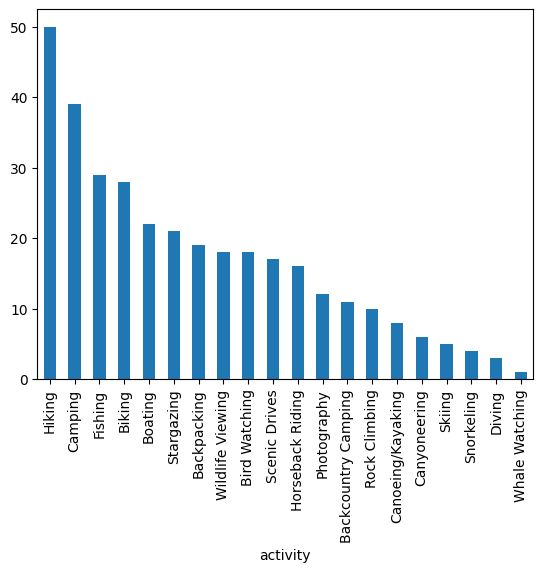

In [57]:
list_act = [x for sublist in activities_df.cleaned.tolist() for x in sublist]

count_activities = pd.DataFrame()
count_activities['activity'] = [x for sublist in activities_df.cleaned.tolist() for x in sublist]
count_activities.value_counts('activity').plot(kind='bar')

In [64]:
activities_df.to_csv('activities.csv', index = False)

In [59]:
activities_df

,park,activities,cleaned
0,ACAD,"[Hiking in Acadia, Bicycling, Birdwatching, St...","[Boating, Bird Watching, Stargazing, Hiking, B..."
1,ARCH,"[Auto Touring, Backpacking, Biking, Camping, C...","[Photography, Hiking, Horseback Riding, Rock C..."
2,BADL,[],[]
3,BIBE,"[Scenic Drives, Day Hikes, Big Bend River Trip...","[Backcountry Camping, Skiing, Bird Watching, S..."
4,BISC,"[Fishing and Lobstering, Convoy Point Jetty Wa...","[Diving, Fishing, Camping, Boating, Bird Watch..."
...,...,...,...
57,NPSA,[Learn more about the Homestay program.],[]
58,NERI,"[Camping, Whitewater, Hiking Trails, Biking, C...","[Fishing, Camping, Backpacking, Scenic Drives,..."
59,VIIS,"[Ranger Programs and Guided Tours!, Interactiv...","[Fishing, Boating, Snorkeling]"
60,WHSA,"[Backcountry Camping, Bicycling, Driving Dunes...","[Photography, Camping, Horseback Riding, Backc..."
